In [1]:
import re

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('datasets/uzreport_uz/uzreport_uz_original.csv')

In [3]:
df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count
0,Xitoy kompaniyasi Toshkentdagi 30 ta yirik kor...,2023-05-02 12:46:01,422,0,0,0,0,0,0,0,0,0
1,Finlyandiya o‘z hududida Amerika harbiy bazasi...,2023-05-02 12:31:58,2236,7,13,0,0,3,0,0,0,0
2,Namangan viloyati hokimiga birinchi o‘rinbosar...,2023-05-02 12:15:52,3626,3,5,0,0,0,0,0,0,0
3,Bolgariya Bosh prokurori Ivan Geshevning hayot...,2023-05-02 12:02:00,4482,9,2,0,0,0,0,0,0,0
4,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",2023-05-02 11:45:48,5952,15,0,0,0,26,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20143 entries, 0 to 20142
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             20143 non-null  object
 1   date             20143 non-null  object
 2   view_count       20143 non-null  int64 
 3   like_count       20143 non-null  int64 
 4   dislike_count    20143 non-null  int64 
 5   love_count       20143 non-null  int64 
 6   fire_count       20143 non-null  int64 
 7   happy_count      20143 non-null  int64 
 8   shocked_count    20143 non-null  int64 
 9   sad_count        20143 non-null  int64 
 10  party_count      20143 non-null  int64 
 11  star_eyes_count  20143 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 1.8+ MB


In [5]:
df.describe()

,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count
count,20143.000000,20143.000000,20143.000000,20143.0,20143.000000,20143.000000,20143.000000,20143.000000,20143.000000,20143.000000
mean,18628.387132,34.523060,8.666038,0.0,2.714640,7.655215,3.473663,3.154843,0.686889,0.964057
std,18708.543548,38.110126,20.184422,0.0,50.023114,17.931356,10.204443,14.021856,4.043676,4.912995
min,422.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14117.000000,15.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16160.000000,24.000000,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,18440.500000,39.000000,8.000000,0.0,1.000000,6.000000,2.000000,0.000000,0.000000,0.000000
max,633451.000000,782.000000,439.000000,0.0,4472.000000,318.000000,291.000000,425.000000,261.000000,414.000000


In [6]:
df['date'] = pd.to_datetime(df['date'])

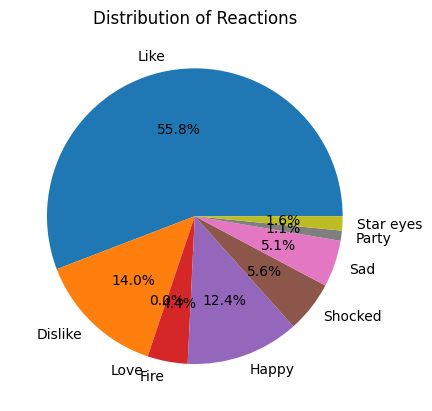

In [7]:
emoji_counts = [df['like_count'].sum(),
                df['dislike_count'].sum(),
                df['love_count'].sum(),
                df['fire_count'].sum(),
                df['happy_count'].sum(),
                df['shocked_count'].sum(),
                df['sad_count'].sum(),
                df['party_count'].sum(),
                df['star_eyes_count'].sum(),
                ]

emoji_labels = ['Like', 'Dislike', 'Love', 'Fire', 'Happy', 'Shocked', 'Sad', 'Party', 'Star eyes', ]

plt.pie(emoji_counts, labels=emoji_labels, autopct='%1.1f%%')
plt.title('Distribution of Reactions')
plt.show()

# Data cleaning

In [8]:
df['total_reactions'] = df['like_count'] + df['dislike_count'] + df['love_count'] + df['fire_count'] + df[
    'happy_count'] + df['shocked_count'] + df['sad_count'] + df['party_count'] + df['star_eyes_count']

df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions
0,Xitoy kompaniyasi Toshkentdagi 30 ta yirik kor...,2023-05-02 12:46:01,422,0,0,0,0,0,0,0,0,0,0
1,Finlyandiya o‘z hududida Amerika harbiy bazasi...,2023-05-02 12:31:58,2236,7,13,0,0,3,0,0,0,0,23
2,Namangan viloyati hokimiga birinchi o‘rinbosar...,2023-05-02 12:15:52,3626,3,5,0,0,0,0,0,0,0,8
3,Bolgariya Bosh prokurori Ivan Geshevning hayot...,2023-05-02 12:02:00,4482,9,2,0,0,0,0,0,0,0,11
4,"""PSJ"" Messining o'rniga bir nechta nomzodlar k...",2023-05-02 11:45:48,5952,15,0,0,0,26,0,0,0,0,41


In [9]:
zero_reactions = df[df['total_reactions'] < 10]
zero_reactions.nunique()

text               318
date               326
view_count         323
like_count          10
dislike_count        6
love_count           1
fire_count           5
happy_count          3
shocked_count        6
sad_count            5
party_count          2
star_eyes_count      4
total_reactions     10
dtype: int64

In [10]:
df.isna().sum()

text               0
date               0
view_count         0
like_count         0
dislike_count      0
love_count         0
fire_count         0
happy_count        0
shocked_count      0
sad_count          0
party_count        0
star_eyes_count    0
total_reactions    0
dtype: int64

In [11]:
df[df['text'].str.contains('reklama', case=False)]

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions
46,Haj tadbirini tashkil etish vazifasi sayyohlik...,2023-05-01 15:00:37,10856,19,1,0,0,3,0,0,0,0,23
171,Avant PIR sendvich panellari: binolarni qurish...,2023-04-28 18:00:30,10866,8,0,0,0,0,0,0,0,0,8
349,Shivaki multi-split tizimlari: yuqori samarali...,2023-04-22 18:31:19,21497,31,0,0,0,3,0,0,0,0,34
452,"Muloqot imkoniyatlarini kengaytiring. Chunki ""...",2023-04-19 15:59:59,7890,14,0,0,0,0,0,0,0,0,14
776,2021-yilda 25 yoshgacha bo‘lgan yoshlarni ishg...,2023-04-11 17:05:56,9136,6,3,0,1,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19744,🚴‍♀️🚴🚴‍♂️ Eurosport’da O‘zbekistonning “Tashke...,2022-01-20 17:45:37,18589,13,0,0,3,6,1,0,0,0,23
19986,Minerva City'dan mega aksiyaga asosan 3 xonali...,2022-01-05 18:00:18,17459,7,14,0,0,2,4,0,5,0,32
20036,Baxtli boshlanishlar maskani - yangi yilda! Ha...,2021-12-29 16:29:56,18195,1,0,0,0,0,0,0,0,0,1
20049,MIMAR GROUP ISHGA TAKLIF QILADI\n\nYirik quril...,2021-12-27 15:00:57,20113,2,0,0,0,0,0,0,0,0,2


In [12]:
df.loc[df['text'].str.contains('reklama', na=False), 'promotional'] = 'yes'
df.loc[~df['text'].str.contains('reklama', na=False), 'promotional'] = 'no'

In [13]:
df.sample(5)

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional
2288,Oʻzbekistondagi xususiy maktablarda 5 mingdan ...,2023-03-12 14:01:16,13324,11,0,0,1,0,0,0,0,0,12,no
7670,"Toshkentda Lacetti Nexia-3 bilan to‘qnashib, o...",2022-12-04 16:30:48,23856,32,9,0,0,0,8,69,2,0,120,no
9435,"Toshkentda 2,5 mlrd so‘mlik imtiyozli kredit m...",2022-11-04 15:14:50,16224,23,0,0,0,11,0,0,0,1,35,no
1749,Yana to‘rt mamlakatda vabo epidemiyasi qayd et...,2023-03-23 14:01:29,12111,10,36,0,0,0,12,16,0,0,74,no
18833,TURON AVTO multibrendli avtosaloni eng manfaat...,2022-03-02 14:28:35,18684,13,0,0,0,1,0,0,0,0,14,no


In [14]:
rows_to_drop = df[(df['promotional'] == 'no') & (df['total_reactions'] <= 9)]
rows_to_drop

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,shocked_count,sad_count,party_count,star_eyes_count,total_reactions,promotional
0,Xitoy kompaniyasi Toshkentdagi 30 ta yirik kor...,2023-05-02 12:46:01,422,0,0,0,0,0,0,0,0,0,0,no
2,Namangan viloyati hokimiga birinchi o‘rinbosar...,2023-05-02 12:15:52,3626,3,5,0,0,0,0,0,0,0,8,no
7,Toshkentda isitish tarmoqlari issiq suv ta’min...,2023-05-02 11:00:52,7017,9,0,0,0,0,0,0,0,0,9,no
64,"Anons\nSeshanba soat 21:30 da Uzreport tvda ""F...",2023-05-01 08:36:02,14760,6,2,0,0,0,0,0,0,0,8,no
171,Avant PIR sendvich panellari: binolarni qurish...,2023-04-28 18:00:30,10866,8,0,0,0,0,0,0,0,0,8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20138,Kunning muhim xabarlari:\n\n▶️ UZREPORT TV bok...,2021-10-14 20:51:51,232597,1,0,0,0,0,0,0,0,0,1,no
20139,Infarkt va koronavirusni boshdan o'tkazgan 90 ...,2021-10-14 17:45:04,22158,1,0,0,0,0,0,0,0,0,1,no
20140,"""Yanada vatanparvarroq bo‘laylik, migrantlar h...",2021-10-14 15:41:13,17842,0,1,0,0,0,0,0,0,0,1,no
20141,"Bundan buyon ""Muradov Professional ligasi""ning...",2021-10-05 23:59:21,20592,0,0,0,0,0,0,1,0,0,1,no


In [15]:
# before dropping
df.shape

(20143, 14)

In [16]:
# drop non-promotional news with total reactions less than 10
df = df.drop(df[(df['promotional'] == 'no') & (df['total_reactions'] < 10)].index)
# after dropping
df.shape

(19817, 14)

In [17]:
df['promotional'].value_counts()

no     19774
yes       43
Name: promotional, dtype: int64

# Data labeling

In [18]:
# # initial weights
# weights = {
#     'like': 1,
#     'dislike': -1,
#     'love': 2,
#     'fire': 1.5,
#     'happy': 1.5,
#     'shocked': -1.5,
#     'sad': -1.5,
#     'party': 1,
#     'star_eyes': 0.5,
# }

# Original weights from study
# weights = {
#     'like': 0.521,
#     'dislike': -0.188,
#     'love': 0.746,
#     'fire': 0.139,
#     'happy': 0.449,
#     'shocked': 0.190,
#     'sad': 0.007,
#     'party': 0.738,
#     'star_eyes': 0.678,
# }

# weights with opposite values (like <-> dislike, happy <-> sad)
weights = {
    'like': 0.521,
    'dislike': -0.521,
    'love': 0.746,
    'fire': 0.139,
    'happy': 0.449,
    'shocked': 0.190,
    'sad': -0.449,
    'party': 0.738,
    'star_eyes': 0.678,
}

In [19]:
import numpy as np
import pandas as pd

# Assuming df and weights are already defined
reaction_types = ['like', 'dislike', 'love', 'fire', 'happy', 'shocked', 'sad', 'party', 'star_eyes']

# Apply logarithmic transformation and multiply by weights
weighted_reactions = pd.DataFrame()
for reaction in reaction_types:
#     Calculation with logarithm
#     condition = df[f'{reaction}_count'].astype(float) > 0
#     weighted_reactions[reaction] = np.where(condition, np.log(df[f'{reaction}_count'].astype(float) + 1) * weights[reaction], 0)
    condition = df[f'{reaction}_count'].astype(float) > 0
    weighted_reactions[reaction] = df[f'{reaction}_count'] * weights[reaction]
      
        
weighted_sums = weighted_reactions.sum(axis=1)
filtered_df = df[df['total_reactions'].astype(float) != 0]
filtered_df['total_weighted_reactions'] = weighted_sums / filtered_df['total_reactions']


print("Max value:", filtered_df['total_weighted_reactions'].max())
print("Min value: ", filtered_df['total_weighted_reactions'].min())  
print("Shape: ", filtered_df.shape)   
weighted_reactions


Max value: 0.6812343750000001
Min value:  -0.505679012345679
Length:  (19817, 15)


,like,dislike,love,fire,happy,shocked,sad,party,star_eyes
1,3.647,-6.773,0.0,0.000,1.347,0.00,-0.000,0.0,0.000
3,4.689,-1.042,0.0,0.000,0.000,0.00,-0.000,0.0,0.000
4,7.815,-0.000,0.0,0.000,11.674,0.00,-0.000,0.0,0.000
5,0.521,-14.067,0.0,0.000,0.449,0.00,-0.000,0.0,0.000
6,6.252,-1.563,0.0,0.000,0.000,0.19,-0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...
20018,5.731,-1.042,0.0,0.278,0.000,1.71,-4.041,0.0,0.000
20019,7.815,-8.857,0.0,0.000,0.000,0.00,-0.000,0.0,0.000
20020,16.151,-0.521,0.0,0.000,0.000,0.00,-0.898,0.0,2.712
20021,5.210,-0.000,0.0,0.000,0.000,0.00,-0.000,0.0,0.678


In [22]:
# define the threshold values
positive_threshold = 0.44
negative_threshold = 0

# cassify the sentiment based on the total weighted reactions
filtered_df['sentiment'] = filtered_df['total_weighted_reactions'].apply(
    lambda x: 'positive' if x >= positive_threshold else ('negative' if x <= negative_threshold else 'neutral'))

print(filtered_df['sentiment'].value_counts())

neutral     9334
positive    8064
negative    2419
Name: sentiment, dtype: int64


### Samples 

In [ ]:
# For not ruining later code
df =filtered_df
df

In [ ]:
df[df['sentiment'] == 'neutral']

In [ ]:
df[df['sentiment'] == 'positive']

In [ ]:
df[df['sentiment'] == 'negative']

In [ ]:
df['sentiment'].value_counts().plot(kind='bar');

In [ ]:
# just drop neutral rows as we only have 87 of such
df = df[df['sentiment'] != 'neutral']

In [ ]:
df['sentiment'].value_counts().plot(kind='bar');

In [ ]:
# remove temp created column
df = df.drop(['total_weighted_reactions'], axis=1)

In [ ]:
df.sample(5)

In [ ]:
df_filtered = df[(df['promotional'] == 'no')]

random_texts = df_filtered.sample(n=20, random_state=42)['text']
for text in random_texts:
    print(text)
    print('------------')

In [ ]:
# analyze most common patterns
username_mentions = df['text'].str.contains('@uzreport_uz').sum()
batafsil_mentions = df['text'].str.contains('Batafsil 👉|To‘liq  👉').sum()
yuklab_olish_mentions = df['text'].str.contains('yuklab olish').sum()
media_mentions = df['text'].str.contains("Facebook'da ko'rish|YouTube'da ko'rish|UzReport rasmiy sahifalari").sum()
questions_mentions = df['text'].str.contains("Savollaringizni @Muborak_Oy_bot orqali jo‘natishingiz mumkin|@Muborak_Oy_bot").sum()

print(f'Username mentions: {username_mentions}')
print(f'Batafsil mentions: {batafsil_mentions}')
print(f'Yuklab olish mentions: {yuklab_olish_mentions}')
print(f'Media mentions: {media_mentions}')
print(f'Questions mentions: {questions_mentions}')

In [ ]:
def clean_text(text):
    patterns = r'@uzreport_uz|Batafsil 👉|To‘liq  👉|yuklab olish|Facebook\'da ko\'rish|YouTube\'da ko\'rish|UzReport rasmiy sahifalari|Savollaringizni @Muborak_Oy_bot orqali jo‘natishingiz mumkin|@Muborak_Oy_bot'
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = re.sub(patterns, '', text)
    text = emoji_pattern.sub(r'', text)
    return text

In [ ]:
smpl_txt = df.iloc[4]['text']

In [ ]:
clean_text(smpl_txt)

In [ ]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
df.sample(5)

In [ ]:
df['cleaned_text'].str.len().plot(kind='hist');

In [ ]:
df['length'] = df['cleaned_text'].str.len()
print(df['length'].describe())

In [ ]:
long_messages = df[df['length'] > 450]['cleaned_text']
long_messages.nunique()

In [ ]:
long_messages

In [ ]:
max_length = 450

df['truncated_text'] = df['cleaned_text'].apply(lambda x: x[:max_length] if len(x) > max_length else x)

truncated_df = df[df['truncated_text'] != df['cleaned_text']]

truncated_df[['cleaned_text', 'truncated_text']].sample(5)

In [ ]:
df['truncated_text'].str.len().plot(kind='hist');

In [ ]:
df['length_tr'] = df['truncated_text'].str.len()
print(df['length_tr'].describe())

In [ ]:
df.head()

In [ ]:
# drop extra columns
df = df.drop(columns=['length', 'cleaned_text', 'length_tr', 'text'])
df = df.rename(columns={'truncated_text': 'text'})
cols = df.columns.tolist()
cols = ['text'] + cols[:-1]
df = df[cols]
df.head()

In [ ]:
df = df.reindex(columns=['text', 'date', 'sentiment', 'promotional', 'view_count', 'like_count', 'dislike_count',
                         'love_count', 'fire_count', 'happy_count', 'shocked_count', 'sad_count', 'party_count',
                         'star_eyes_count', 'total_reactions'])
df.head()

In [ ]:
df.to_csv('uzreport_uz_cleaned_labeled.csv', index=False)

In [ ]:
compact_df = df[['text', 'date', 'sentiment', 'promotional']]
compact_df.head()

In [ ]:
compact_df.to_csv('uzreport_uz_cleaned_labeled_compact.csv', index=False)